<a href="https://colab.research.google.com/github/TeinkBR/1D_harmonic_oscillator/blob/main/Simulation_Physics_Work_sheet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2.1 Simulating a cannon ball

In this exercise, you will simulate the trajectory of a cannonball in $2 \mathrm{D}$ until it hits the ground. In order to do so you have to solve Newton's equations of motion:
$$
\begin{aligned}
\frac{\mathrm{d} \mathbf{x}(t)}{\mathrm{d} t} &=\mathbf{v}(t) \\
\frac{\mathrm{d} \mathbf{v}(t)}{\mathrm{d} t} &=\frac{\mathbf{F}(t)}{m}
\end{aligned}
$$
where $\mathrm{x}(t)$ is the position as a function of time $t, m$ is the mass and $\mathbf{F}(t)$ is the force as a function of time.

At time $t=0$, the cannonball (mass $m=2.0 \mathrm{~kg}$ ) has a position of $\mathbf{x}(0)=0$ and a velocity of $\mathbf{v}(0)=(50,50)^{\top} \mathrm{m} \mathrm{s}^{-1}$.

To simulate the cannonball, you will use the simple Euler scheme to propagate the position $\mathrm{x}(t)$ and velocity $\mathrm{v}(t)$ at time $t$ to the time $t+\Delta t(\Delta t=0.1 \mathrm{~s})$ :
$$
\begin{aligned}
&\mathrm{x}(t+\Delta t)=\mathrm{x}(t)+\mathrm{v}(t) \Delta t \\
&\mathrm{v}(t+\Delta t)=\mathrm{v}(t)+\frac{\mathrm{F}(t)}{m} \Delta t
\end{aligned}
$$


$$
y^{\prime}(t)=f(t, y(t)), \quad y\left(t_0\right)=y_0 .
$$
Choose a value $h$ for the size of every step and set $t_n=t_0+n h$. Now, one step of the Euler method from $t_n$ to $t_{n+1}=t_n+h$ is: ${ }^{[3]}$
$$
y_{n+1}=y_n+h f\left(t_n, y_n\right)
$$

In [81]:
## important import
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from pylab import plot, show, xlabel, ylabel
import seaborn as sns
from matplotlib import animation
plt.style.use('seaborn-poster')
%matplotlib inline

In [74]:
# Model parameters
mass_cannon_ball = 1.0          # mass of cannon ball
g = 9.8          # Acceleration due to gravity (m/s^2)
r_init=10
v_init=50
t_init=0
t_end=100
angle=30
F_friction = 0 # force of resistance 
time_step = 1e-1         # time step in seconds(s)

In [75]:
# Use Euler method to update variables
def euler_method(r_init,v_init,t_init,t_end,F_friction,angle,time_step):
  x_init=r_init*np.cos(angle/180*np.pi)    ## convert to radian
  y_init=r_init*np.sin(angle/180*np.pi)
  v_x_init=v_init*np.cos(angle/180*np.pi)
  v_y_init=v_init*np.sin(angle/180*np.pi)

  v_x=[v_x_init]
  v_y=[v_y_init]
  x=[x_init]
  y=[y_init]
  time_range=np.arange(t_init,t_end,time_step)
  ax = [-(F_friction*np.cos(angle/180*np.pi))/mass_cannon_ball]        
  ay = [-g-(F_friction*np.sin(angle/180*np.pi)/mass_cannon_ball)]

  print('t range shape',np.shape(time_range))
  for t_index,t in enumerate(time_range):
       
    v_x.append(v_x[t_index]+time_step*ax[t_index])                                       ## velocity change on x dirextion
    v_y.append(v_y[t_index]+time_step*ay[t_index])                                       ## velocity change on y direction
    x.append(x[t_index]+time_step*v_x[t_index])                                          ## displacement on x direction
    y.append(y[t_index]+time_step*v_y[t_index])                                          ## displacement on y direction
    ax.append(-(F_friction*np.cos(angle/180*np.pi))/mass_cannon_ball)     ## accelaration on x direction
    ay.append(-g-(F_friction*np.sin(angle/180*np.pi)/mass_cannon_ball))   ## accelaration on y direction          
    
    # Print the values to check
   # t_index=t_index+1
  print ("t=", t_index)
  print ("vx=", v_x)

  return x,y,v_x,v_y,time_range


In [76]:
x,y,v_x,v_y,t=euler_method(r_init, v_init, t_init, t_end,F_friction, angle, time_step)

t range shape (1000,)
t= 999
vx= [43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.30127018922194, 43.3012701892219

Text(0.5, 0, 'time (s)')

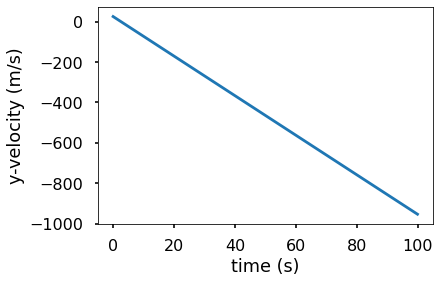

In [77]:
plt.plot(t,v_y[0:-1])
plt.ylabel("y-velocity (m/s)")
plt.xlabel("time (s)")

Text(0.5, 0, 'time (s)')

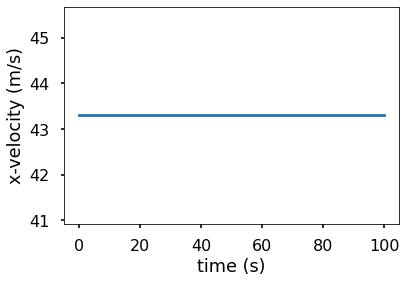

In [78]:
plt.plot(t,v_x[0:-1])
plt.ylabel("x-velocity (m/s)")
plt.xlabel("time (s)")

Text(0.5, 0, 'x-velocity (m/s)')

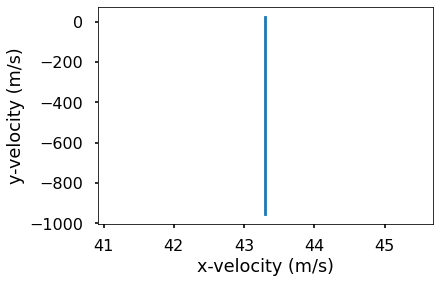

In [79]:
plt.plot(v_x,v_y)
plt.ylabel("y-velocity (m/s)")
plt.xlabel("x-velocity (m/s)")

Text(0.5, 0, 'x (m)')

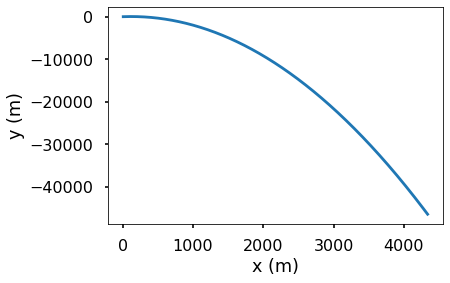

In [80]:
plt.plot(x,y,'-')
plt.ylabel("y (m)")
plt.xlabel("x (m)")

# 3.1 Simulating the solar system with the Euler scheme



The behavior of the solar system is governed by the gravitational force between any two "particles":
$$
\mathbf{F}_{i j}=-G m_i m_j \frac{\mathbf{r}_{i j}}{\left|\mathbf{r}_{i j}\right|^3}
$$
where $\mathbf{r}_{i j}=\mathbf{x}_i-\mathbf{x}_j$ is the distance between particle $i$ and $j, G$ is the gravitational constant, and $m_i$ is the mass of particle $i$. The total force on any single particle is:
$$
\mathbf{F}_i=\sum_{\substack{j=0 \\ i \neq j}}^N \mathbf{F}_{i j}
$$

data ready
0


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
StopIteration


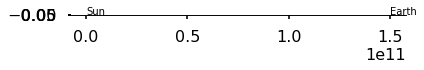

In [86]:
# Code for simulate orbit article
#%% Generate data
G           = 6.67e-11                  # constant G
M_sun          = 2.0e30                    # sun
M_earth          = 5.972e29                  # earth  
M_moon =5.1e8     
AU          = 1.5e11                    # earth sun distance
daysec      = 24.0*60*60                # seconds of a day
e_ap_v      = 29290                     # earth velocity at aphelion

gravconst_earth_sun = G*M_earth*M_sun
gravconst_earth_moon =G*M_earth*M_moon
# setup the starting conditions
# earth
x_earth,y_earth     = 1.0167*AU,0
xv_earth,yv_earth= 0,e_ap_v

x_moon,y_moon    = 0.007*AU,0
xv_moon,yv_moon = 0,0.001*0


# sun
xs,ys,zs    = 0,0,0
xvs,yvs,zvs = 0,0,0

t           = 0.0
dt          = 1*daysec # every frame move this time

xelist,yelist,zelist = [],[],[]
xslist,yslist,zslist = [],[],[]

# start simulation
def euler_method_solar(x_init_earth,y_init_earth,x_init_sun,y_init_sun,x_init_moon,y_init_moon,t_init,t_end,time_step):
  t=np.arange(t_init,t_end,time_step)
  while t<5*365*daysec:
    ################ earth #############
    # compute G force on earth
    earth_rx,earth_ry,earth_rz = x_init_earth - x_init_sun,  y_init_earth - y_init_sun

    # compute G force on moon

    moon_rx,moon_ry,moon_rz = x_init_moon - x_init_earth,  y_init_moon - y_init_earth


    modr3_earth = (earth_rx**2+earth_ry**2)**1.5
    modr3_moon = (moon_rx**2+moon_ry**2)**1.5

    fx_earth = -gravconst_earth_sun*earth_rx/modr3_earth
    fy_earth = -gravconst_earth_sun*earth_ry/modr3_earth
    

    fx_moon = -gravconst_earth_moon*moon_rx/modr3_moon
    fy_moon = -gravconst_earth_moon*moon_ry/modr3_moon
   
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xv_earth += fx_earth*dt/M_earth
    yv_earth += fx_earth*dt/M_earth

    xv_moon += fx_moon*dt/M_moon
    yv_moon += fx_moon*dt/M_moon
    
    
    # update position
    x_earth += xv_earth*dt
    y_earth += yv_earth*dt 
   
    
    # save the position in list
    xelist.append(x_earth)
    yelist.append(y_earth)
  
    
    ################ the sun ###########
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvs += -fx_earth*dt/M_sun
    yvs += -fx_earth*dt/M_sun
    
    
    # update position
    xs += xvs*dt
    ys += yvs*dt 
    zs += zvs*dt
    xslist.append(xs)
    yslist.append(ys)
    zslist.append(zs)
    
    # update dt
    t +=dt
print('data ready')



fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.grid()

line_e,     = ax.plot([],[],'-g',lw=1,c='blue')
point_e,    = ax.plot([AU], [0], marker="o", markersize=4, markeredgecolor="blue", markerfacecolor="blue")
text_e      = ax.text(AU,0,'Earth')

point_s,    = ax.plot([0], [0], marker="o", markersize=7, markeredgecolor="yellow", markerfacecolor="yellow")
text_s      = ax.text(0,0,'Sun')

exdata,eydata = [],[]                   # earth track
sxdata,sydata = [],[]                   # sun track
# mxdata,mydata = [],[]                   # mars track
# cxdata,cydata = [],[]

print(len(xelist))

def update(i):
    exdata.append(xelist[i])
    eydata.append(yelist[i])
    
    line_e.set_data(exdata,eydata)
    point_e.set_data(xelist[i],yelist[i])
    text_e.set_position((xelist[i],yelist[i]))

    point_s.set_data(xslist[i],yslist[i])
    text_s.set_position((xslist[i],yslist[i]))
    
    ax.axis('equal')
    ax.set_xlim(-2*AU,2*AU)
    ax.set_ylim(-2*AU,2*AU)
    #print(i)
    return line_e,point_s,point_e,text_e,text_s

anim = animation.FuncAnimation(fig,func=update,frames=len(xelist),interval=1,blit=True)
plt.show()
